# Explore Experiment Run Results


In [1]:
from azureml.core import Workspace, run
ws = Workspace.from_config()


exp_name = 'catsanddogsexp'
run_name = 'loving_jelly_cn1qpdm5'





In [14]:
from azureml.core import Workspace,Experiment,Run


# get workspace
ws = Workspace.from_config()

# # get/create experiment
# exp = Experiment(ws, exp_name)

# # get run
# run = Run(exp, run_name)

# # submit script to AML
# # RunDetails(run).show()


[r for r in ws.experiments[exp_name].get_runs()]

[Run(Experiment: catsanddogsexp,
 Id: catsanddogsexp_1692429905_0bbe4429,
 Type: azureml.scriptrun,
 Status: Completed),
 Run(Experiment: catsanddogsexp,
 Id: 9bf5e8d5-35cc-410f-981d-110c321a18ad,
 Type: None,
 Status: Completed),
 Run(Experiment: catsanddogsexp,
 Id: 0adb5f87-f50e-42cd-bf3e-e273fdf7bc6b,
 Type: None,
 Status: Completed)]

In [17]:
exp = ws.experiments[exp_name]
run = ws.get_run('0adb5f87-f50e-42cd-bf3e-e273fdf7bc6b')

In [20]:
print(run.display_name)
#run.register_model(model_name='cats_and_dogs', model_path='model')
print(run.get_metrics().keys())

print(run.get_metrics()['val_accuracy'][-1])

teal_screw_fnk11y5f


dict_keys(['val_accuracy', 'loss', 'val_loss', 'lr', 'accuracy', 'stopped_epoch'])
0.9039999842643738


In [21]:
print(f'validation accuracy: {run.get_metrics()["val_accuracy"][-1]}')
print(f'Experiment Run status: {run.get_details()["status"]}')

validation accuracy: 0.9039999842643738
Experiment Run status: Completed


## Download Model

Download and use the MLflow model artifact

Model artifact is logged by mlflow's autologging, following this format: https://www.tensorflow.org/guide/keras/save_and_serialize#tf_checkpoint_format

In [22]:
from tensorflow import keras
run.download_files('model', output_directory='.logs')
model = keras.models.load_model('.logs/model/data/model') 
model.summary()

2023-08-19 08:55:26.079074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-19 08:55:26.229753: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-19 08:55:26.931468: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/compilers_and_libraries_2018.3.222/linux/mpi/intel64/lib:/opt/intel/compiler

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 500)               2304500   
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 17,019,689
Trainable params: 9,384,425
Non-trainable params: 7,635,264
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3

In [23]:
print('Number of layers: ', len(model.get_config()['layers']))
print('Model type: ', type(model))

Number of layers:  5
Model type:  <class 'keras.engine.sequential.Sequential'>


To ensure dataset is mounted, run [explore dataset notebook](02_explore_dataset.ipynb). 

1/1 [==============================] - 0s 281ms/step
[[1.]]


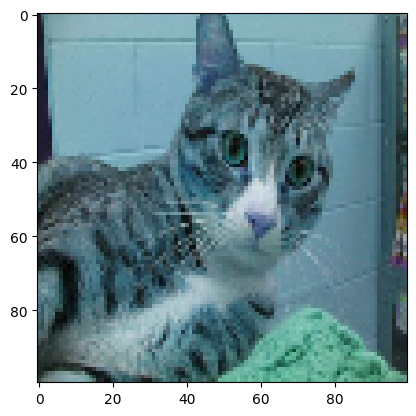

In [24]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

img_fn = '/mnt/tmp/cats_dogs/validation/cats/cat.2012.jpg'
img_data = open(img_fn, 'rb').read()
img = cv2.imread(img_fn)
img2 = cv2.resize(img, (100,100))
img2.shape

plt.imshow(img2)

print(model.predict(img2.reshape(1,100,100,3)))

1/1 [==============================] - 0s 81ms/step


[[1.]]


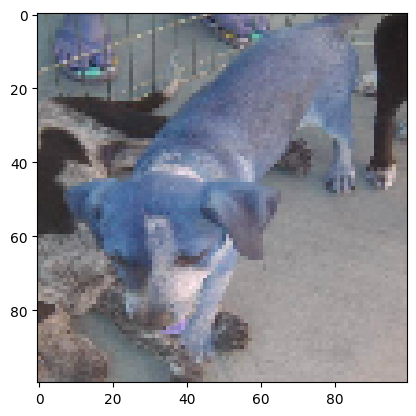

In [25]:
img_fn = '/mnt/tmp/cats_dogs/validation/dogs/dog.2060.jpg'
img_data = open(img_fn, 'rb').read()
img = cv2.imread(img_fn)


img2 = cv2.resize(img, (100,100))
img2.shape

plt.imshow(img2)

print(model.predict(img2.reshape(1,100,100,3)))

In [26]:
root_folder = os.path.expanduser('/mnt/tmp/cats_dogs/train/cats/')

import glob
list_files = glob.glob(root_folder + '*')
len(list_files)

1000

In [27]:
for fn in list_files[:10]: 
    img_data = open(fn, 'rb').read()
    img = cv2.imread(fn)
    img2 = cv2.resize(img, (100,100))
    #img2.shape
    #plt.imshow(img2)
    prediction = model.predict(img2.reshape(1,100,100,3))
    print(prediction)

1/1 [==============================] - 0s 57ms/step
[[1.]]
1/1 [==============================] - 0s 68ms/step
[[1.]]
1/1 [==============================] - 0s 69ms/step


[[1.]]
1/1 [==============================] - 0s 66ms/step
[[1.559133e-15]]
1/1 [==============================] - 0s 58ms/step
[[1.]]
1/1 [==============================] - 0s 73ms/step
[[9.399698e-10]]
1/1 [==============================] - 0s 63ms/step
[[0.9999997]]
1/1 [==============================] - 0s 64ms/step
[[0.01705281]]
1/1 [==============================] - 0s 62ms/step
[[1.]]
1/1 [==============================] - 0s 70ms/step
[[1.]]


## Tensorboard Logs 

https://docs.microsoft.com/en-us/azure/machine-learning/how-to-monitor-tensorboard#launch-tensorboard 

Ensure that you have the tensorboard extra installed with Azureml ML SDK, from terminal run: 

```
conda env list
conda activate azureml_py38_PT_TF
pip install azureml-tensorboard
```

In [28]:
from azureml.tensorboard import Tensorboard
from azureml.tensorboard.export import export_to_tensorboard

# Download tensorboard_logs from run artifacts
run.download_files('tensorboard_logs', '.logs')

# create and start a tensorboard dashboard
tb = Tensorboard([], local_root='.logs/tensorboard_logs')
tb.start()

https://mutaz-6006.eastus.instances.azureml.ms


'https://mutaz-6006.eastus.instances.azureml.ms'

In [45]:
#tb.stop()